In [1]:
import openturns as ot
import pyAgrum as gum
import otagrum as ota

In [2]:
import os
import os.path as path

In [3]:
import matplotlib.pyplot as plt

def plot_error(x, mean, std, alpha=0.4, ax=None):
    x, mean, std = np.array(x), np.array(mean), np.array(std)
    x, mean, std = x.flatten(), mean.flatten(), std.flatten()
    lower, upper = mean-std, mean+std
    if ax:
        ax.fill_between(x, lower, upper, alpha=alpha)
    else:
        plt.fill_between(x, lower, upper, alpha=alpha)

In [4]:
import numpy as np

def compute_means(sizes):
    mean_sizes = np.mean(sizes, axis=1).reshape((len(sizes),1))
    return mean_sizes

def compute_stds(sizes):
    std_sizes = np.std(sizes, axis=1).reshape((len(sizes),1))
    return std_sizes

In [5]:
from sklearn.linear_model import LinearRegression

# Gaussien

## One arc

In [6]:
directory = "../../data/samples/gaussian/oneArc/"

In [7]:
directories = [d for d in os.listdir(directory) if path.isdir(path.join(directory, d))]
directories.sort()
directories = [path.join(directory, d) for d in directories]

In [8]:
r_values = [directories[i].split('/')[-1][1:] for i in range(len(directories))]
r_values = [r_values[i][0] + '.' + r_values[i][1:] for i in range(len(directories))]
r_values = [float(r) for r in r_values]
r_values = np.array(r_values)

In [9]:
n_inARow = 100
n_restart = 10

fromSize = []
for d in directories:
    print(d)
    files = [f for f in os.listdir(d) if path.isfile(path.join(d, f))]
    files.sort()
    files = [path.join(d, f) for f in files]
    files = files[0:n_restart]
    restarts = []
    for f in files:
        print(f)
        #file = path.join(d, "oneArc_gaussian_sample_01.csv")
        sample = ot.Sample.ImportFromTextFile(f, ',')

        inARow = 0
        for size in range(2, len(sample)):
            test = ota.ContinuousTTest(sample[0:size])
            if test.isIndep(0,1,[])[2]:
                inARow = 0
            else:
                inARow +=1
                if inARow >= n_inARow:
                    restarts.append(size-inARow+1)
                    break
    fromSize.append(restarts)

../../data/samples/gaussian/oneArc/r01
../../data/samples/gaussian/oneArc/r01/oneArc_gaussian_sample_01.csv
../../data/samples/gaussian/oneArc/r01/oneArc_gaussian_sample_02.csv
../../data/samples/gaussian/oneArc/r01/oneArc_gaussian_sample_03.csv
../../data/samples/gaussian/oneArc/r01/oneArc_gaussian_sample_04.csv
../../data/samples/gaussian/oneArc/r01/oneArc_gaussian_sample_05.csv
../../data/samples/gaussian/oneArc/r01/oneArc_gaussian_sample_06.csv
../../data/samples/gaussian/oneArc/r01/oneArc_gaussian_sample_07.csv
../../data/samples/gaussian/oneArc/r01/oneArc_gaussian_sample_08.csv
../../data/samples/gaussian/oneArc/r01/oneArc_gaussian_sample_09.csv
../../data/samples/gaussian/oneArc/r01/oneArc_gaussian_sample_10.csv
../../data/samples/gaussian/oneArc/r015
../../data/samples/gaussian/oneArc/r015/oneArc_gaussian_sample_01.csv
../../data/samples/gaussian/oneArc/r015/oneArc_gaussian_sample_02.csv
../../data/samples/gaussian/oneArc/r015/oneArc_gaussian_sample_03.csv
../../data/samples/ga

../../data/samples/gaussian/oneArc/r065/oneArc_gaussian_sample_03.csv
../../data/samples/gaussian/oneArc/r065/oneArc_gaussian_sample_04.csv
../../data/samples/gaussian/oneArc/r065/oneArc_gaussian_sample_05.csv
../../data/samples/gaussian/oneArc/r065/oneArc_gaussian_sample_06.csv
../../data/samples/gaussian/oneArc/r065/oneArc_gaussian_sample_07.csv
../../data/samples/gaussian/oneArc/r065/oneArc_gaussian_sample_08.csv
../../data/samples/gaussian/oneArc/r065/oneArc_gaussian_sample_09.csv
../../data/samples/gaussian/oneArc/r065/oneArc_gaussian_sample_10.csv
../../data/samples/gaussian/oneArc/r07
../../data/samples/gaussian/oneArc/r07/oneArc_gaussian_sample_01.csv
../../data/samples/gaussian/oneArc/r07/oneArc_gaussian_sample_02.csv
../../data/samples/gaussian/oneArc/r07/oneArc_gaussian_sample_03.csv
../../data/samples/gaussian/oneArc/r07/oneArc_gaussian_sample_04.csv
../../data/samples/gaussian/oneArc/r07/oneArc_gaussian_sample_05.csv
../../data/samples/gaussian/oneArc/r07/oneArc_gaussian_s

In [10]:
mean = compute_means(fromSize)
std = compute_stds(fromSize)

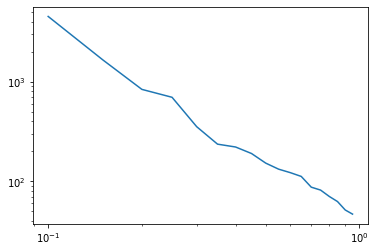

In [11]:
plt.loglog(r_values, mean)
#plot_error(r_values, mean, std)
plt.show()

In [12]:
reg = LinearRegression().fit(np.log(r_values.reshape(-1,1)), np.log(mean))

In [13]:
a = reg.coef_[0][0]
b = reg.intercept_[0]
print(a,b)

-1.9170054833529582 3.755814292592948


In [14]:
x = np.linspace(0.1,0.95,18)
y = np.exp(b) * x**a

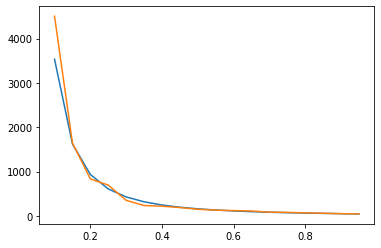

In [15]:
plt.plot(x,y)
plt.plot(r_values, mean)
plt.show()

## V-structure

In [39]:
directory = "../../data/samples/gaussian/vStruct/"

In [40]:
directories = [d for d in os.listdir(directory) if path.isdir(path.join(directory, d))]
directories.sort()
directories = [path.join(directory, d) for d in directories]

In [41]:
r_values = [directories[i].split('/')[-1][1:] for i in range(len(directories))]
r_values = [r_values[i][0] + '.' + r_values[i][1:] for i in range(len(directories))]
r_values = [float(r) for r in r_values]
r_values = np.array(r_values)

In [45]:
n_inARow = 3
n_restart = 10
step_size = 1000

fromSize = []
for d in directories:
    print(d)
    files = [f for f in os.listdir(d) if path.isfile(path.join(d, f))]
    files.sort()
    files = [path.join(d, f) for f in files]
    files = files[0:n_restart]
    restarts = []
    for f in files:
        print(f)
        #file = path.join(d, "oneArc_gaussian_sample_01.csv")
        sample = ot.Sample.ImportFromTextFile(f, ',')
        inARow = 0
        for size in range(2, len(sample), step_size):
            test = ota.ContinuousTTest(sample[0:size])
            if size%1002 == 0:
                print(size)
                print(test.isIndep(0,2,[1]))
            if test.isIndep(0,2,[1])[2]:
                inARow = 0
            else:
                inARow +=1
                if inARow >= n_inARow:
                    restarts.append(size-inARow+1)
                    break
    fromSize.append(restarts)

../../data/samples/gaussian/vStruct/r01
../../data/samples/gaussian/vStruct/r01/vStruct_gaussian_sample_01.csv
1002
(0.42581107939248086, 0.6702455130118841, True)
../../data/samples/gaussian/vStruct/r01/vStruct_gaussian_sample_02.csv
1002
(-0.01460044797292998, 0.9883509418606664, True)


KeyboardInterrupt: 

# Student

In [16]:
directory = "../../data/samples/student/oneArc/"

In [17]:
directories = [d for d in os.listdir(directory) if path.isdir(path.join(directory, d))]
directories.sort()
directories = [path.join(directory, d) for d in directories]

In [18]:
r_values = [directories[i].split('/')[-1][1:] for i in range(len(directories))]
r_values = [r_values[i][0] + '.' + r_values[i][1:] for i in range(len(directories))]
r_values = [float(r) for r in r_values]
r_values = np.array(r_values)

In [19]:
n_inARow = 100
n_restart = 10

fromSize = []
for d in directories:
    print(d)
    files = [f for f in os.listdir(d) if path.isfile(path.join(d, f))]
    files.sort()
    files = [path.join(d, f) for f in files]
    files = files[0:n_restart]
    restarts = []
    for f in files:
        print(f)
        #file = path.join(d, "oneArc_gaussian_sample_01.csv")
        sample = ot.Sample.ImportFromTextFile(f, ',')

        inARow = 0
        for size in range(2, len(sample)):
            test = ota.ContinuousTTest(sample[0:size])
            #if size%100 == 0:
            #    print(size)
            #    print(test.isIndep(0,1,[]))
            if test.isIndep(0,1,[])[2]:
                inARow = 0
            else:
                inARow +=1
                if inARow >= n_inARow:
                    restarts.append(size-inARow+1)
                    break
    fromSize.append(restarts)

../../data/samples/student/oneArc/r01
../../data/samples/student/oneArc/r01/oneArc_student_sample_01.csv
../../data/samples/student/oneArc/r01/oneArc_student_sample_02.csv
../../data/samples/student/oneArc/r01/oneArc_student_sample_03.csv
../../data/samples/student/oneArc/r01/oneArc_student_sample_04.csv
../../data/samples/student/oneArc/r01/oneArc_student_sample_05.csv
../../data/samples/student/oneArc/r01/oneArc_student_sample_06.csv
../../data/samples/student/oneArc/r01/oneArc_student_sample_07.csv
../../data/samples/student/oneArc/r01/oneArc_student_sample_08.csv
../../data/samples/student/oneArc/r01/oneArc_student_sample_09.csv
../../data/samples/student/oneArc/r01/oneArc_student_sample_10.csv
../../data/samples/student/oneArc/r015
../../data/samples/student/oneArc/r015/oneArc_student_sample_01.csv
../../data/samples/student/oneArc/r015/oneArc_student_sample_02.csv
../../data/samples/student/oneArc/r015/oneArc_student_sample_03.csv
../../data/samples/student/oneArc/r015/oneArc_stu

../../data/samples/student/oneArc/r065/oneArc_student_sample_07.csv
../../data/samples/student/oneArc/r065/oneArc_student_sample_08.csv
../../data/samples/student/oneArc/r065/oneArc_student_sample_09.csv
../../data/samples/student/oneArc/r065/oneArc_student_sample_10.csv
../../data/samples/student/oneArc/r07
../../data/samples/student/oneArc/r07/oneArc_student_sample_01.csv
../../data/samples/student/oneArc/r07/oneArc_student_sample_02.csv
../../data/samples/student/oneArc/r07/oneArc_student_sample_03.csv
../../data/samples/student/oneArc/r07/oneArc_student_sample_04.csv
../../data/samples/student/oneArc/r07/oneArc_student_sample_05.csv
../../data/samples/student/oneArc/r07/oneArc_student_sample_06.csv
../../data/samples/student/oneArc/r07/oneArc_student_sample_07.csv
../../data/samples/student/oneArc/r07/oneArc_student_sample_08.csv
../../data/samples/student/oneArc/r07/oneArc_student_sample_09.csv
../../data/samples/student/oneArc/r07/oneArc_student_sample_10.csv
../../data/samples/s

In [20]:
mean = compute_means(fromSize)
std = compute_stds(fromSize)

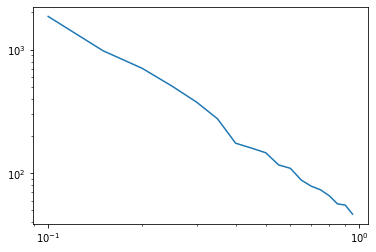

In [21]:
plt.loglog(r_values, mean)
#plot_error(r_values, mean, std)
plt.show()

In [22]:
reg = LinearRegression().fit(np.log(r_values.reshape(-1,1)), np.log(mean))

In [23]:
a = reg.coef_[0][0]
b = reg.intercept_[0]
print(a,b)

-1.6622527173178943 3.8007111664964377


In [24]:
x = np.linspace(0.1,0.95,18)
y = np.exp(b) * x**a

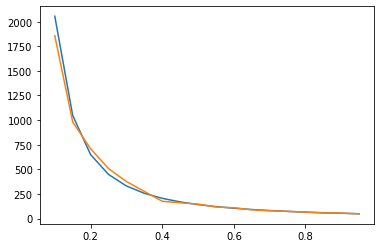

In [25]:
plt.plot(x,y)
plt.plot(r_values, mean)
plt.show()